## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [3]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

california = pd.read_csv('housing.csv')
X = california.drop(columns = ['median_house_value']).copy()
y = california[['median_house_value']]

In [6]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [7]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [8]:
california = california.dropna()

In [9]:
california = california.drop(columns='ocean_proximity')
california.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [10]:
california.corr()['median_house_value']

longitude            -0.045398
latitude             -0.144638
housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [11]:
X = california.drop(columns = ['median_house_value']).copy()
y = california[['median_house_value']]

In [12]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [13]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [15]:
regr_1 = DecisionTreeRegressor(max_depth=8)
regr_2 = DecisionTreeRegressor(max_depth=2)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [16]:
mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse2 = mean_squared_error(y_test, regr_2.predict(X_test))

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore com profundidade=8 é: 4226557855,99
O MSE da árvore com profundidade=2 é: 7543676311,00


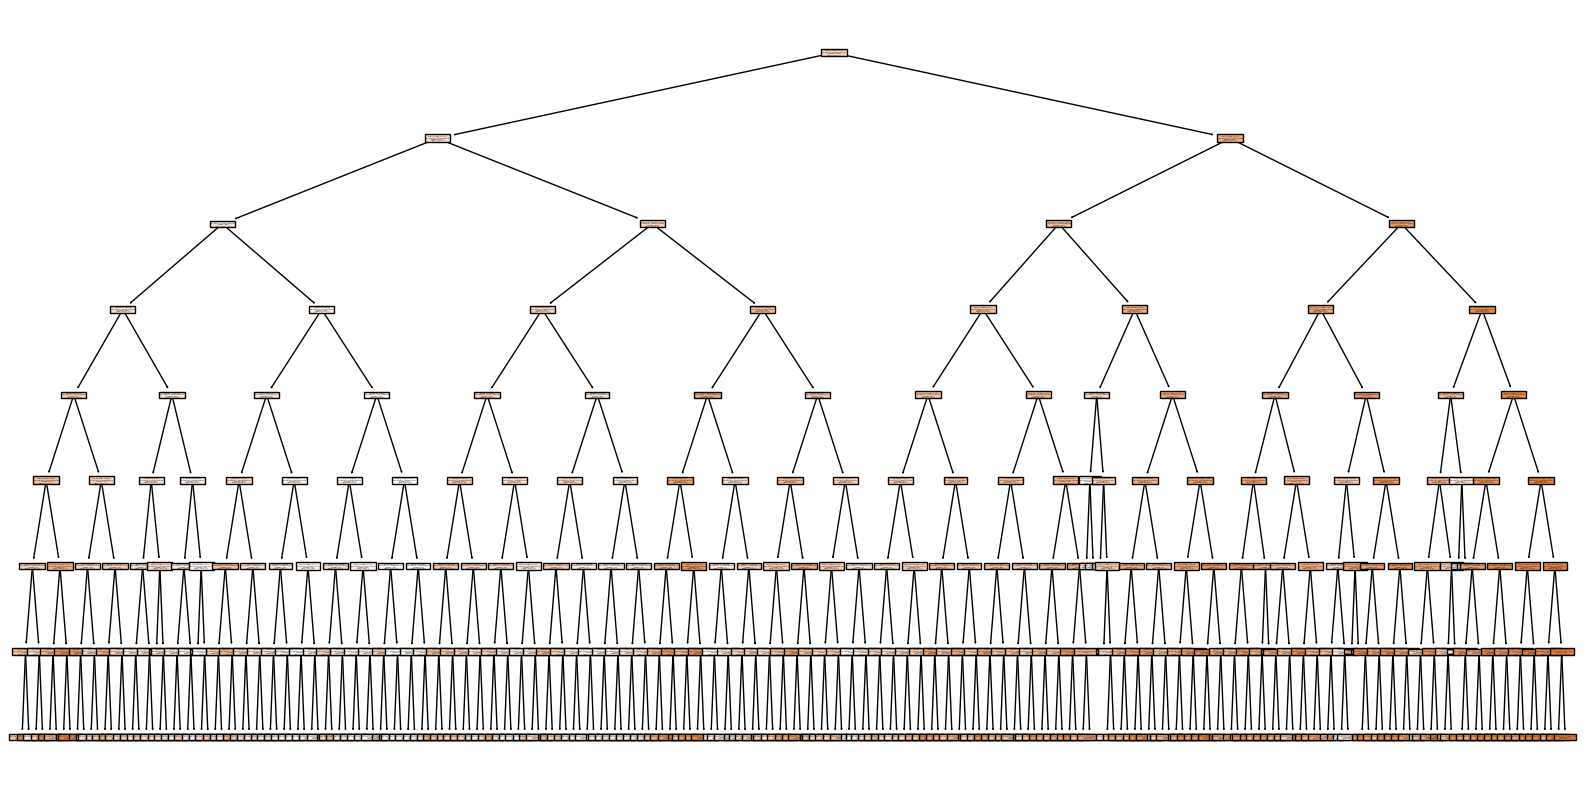

In [17]:
plt.rc('figure', figsize=(20, 10))
tp = tree.plot_tree(regr_1,
                    feature_names=X.columns,
                    filled=True)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [19]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)

Text(0, 0.5, 'Impureza total das folhas')

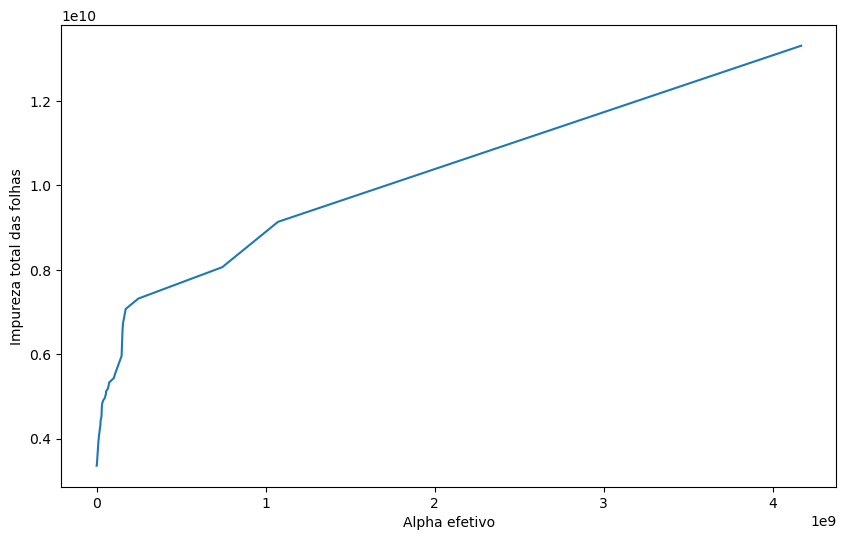

In [20]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [22]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

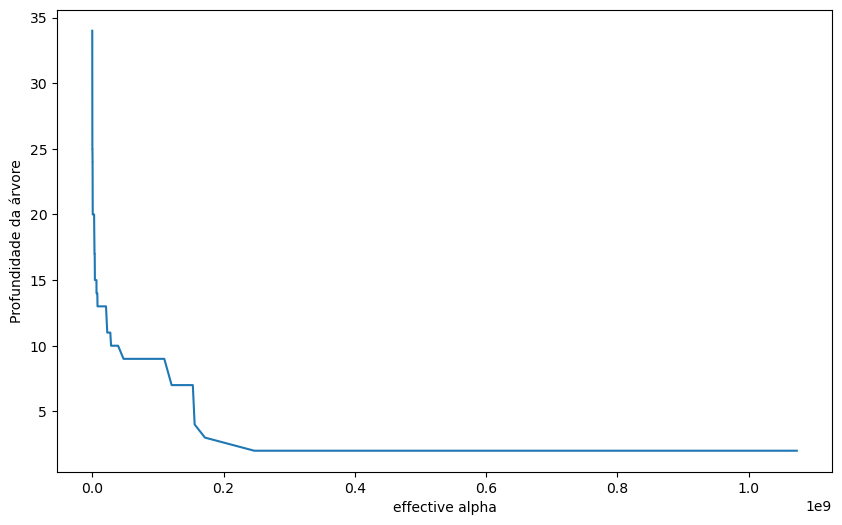

In [23]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [25]:
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

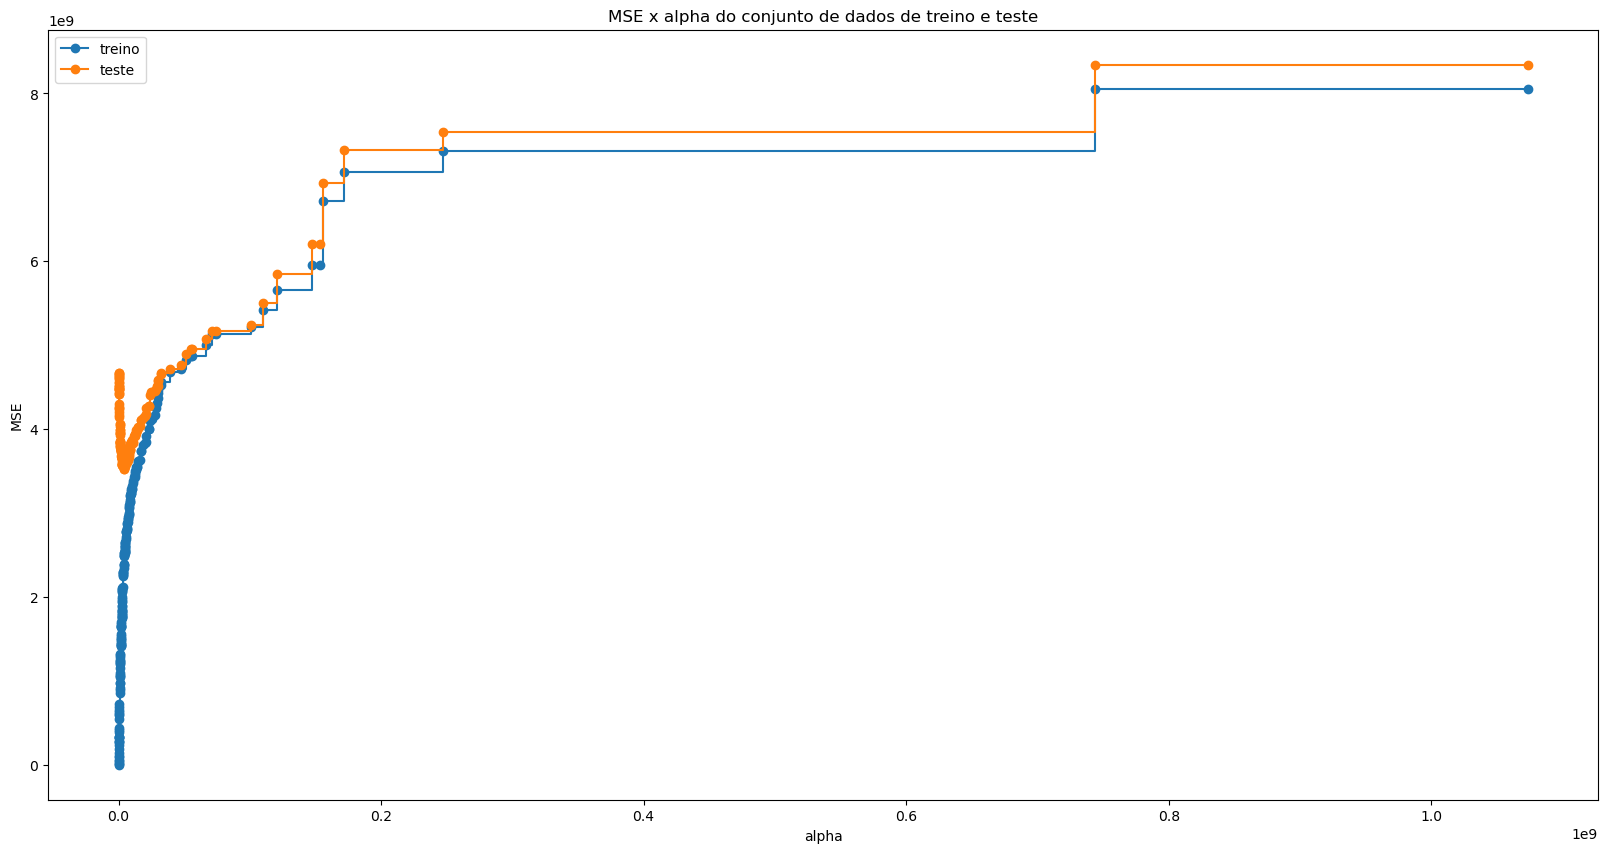

In [27]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [29]:
final_tree = DecisionTreeRegressor(random_state=0, ccp_alpha = 0.1, max_depth=5)

final_tree.fit(X_train, y_train)

r_quadrado1 = final_tree.score(X_test, y_test)

r_quadrado1

0.5901986658352053

### 7. Visualize esta árvore.

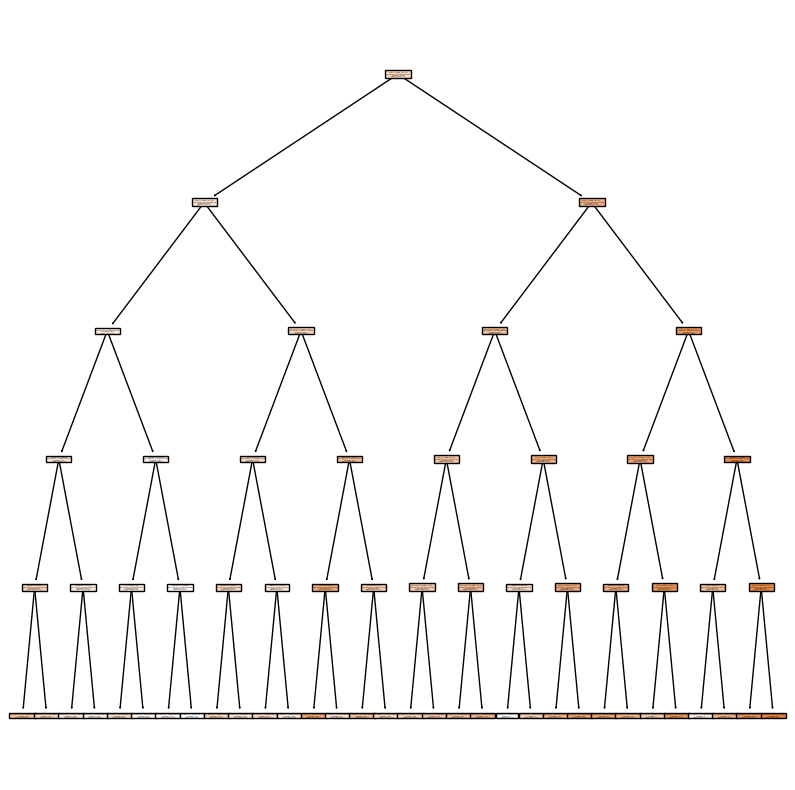

In [31]:
feature_names = list(X.columns)
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(final_tree, 
                    feature_names=feature_names,  
                    filled=True) 